In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
deltas_path='/global/cfs/cdirs/desi/science/lya/mock_analysis/develop/ifae-ql/qq_desi_y3/v1.0.5/analysis-0/jura-124/raw_bao_unblinding/deltas_lya/Delta/'
delta_file=deltas_path+'delta-500.fits.gz'
file = fits.open(delta_file)

In [3]:
ihdu=1
# quasar meta data
z_qso=file[ihdu].header['Z']
RA=file[ihdu].header['RA']
Dec=file[ihdu].header['DEC']

In [4]:
# forest data
wave_data=10.0**(file[ihdu].data['LOGLAM'])
delta_data=file[ihdu].data['DELTA']
#weight_data=file[ihdu].data['WEIGHT']

Text(0, 0.5, 'Delta flux')

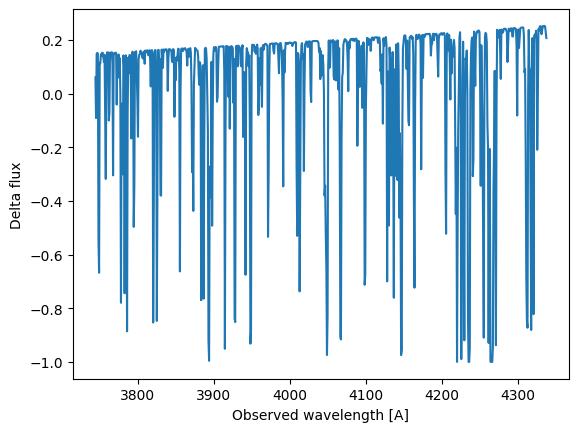

In [5]:
# make simple plot
plt.plot(wave_data,delta_data)
plt.xlabel('Observed wavelength [A]')
plt.ylabel('Delta flux')

In [6]:
# pixel width, in Angstroms
pw_A = 0.8
print(min(wave_data[1:]-wave_data[:-1]),max(wave_data[1:]-wave_data[:-1]),pw_A)
# number of pixels in the forest
N_data = len(wave_data)
print(N_data, 'pixels')

0.7999999999951797 0.8000000000042746 0.8
743 pixels


In [7]:
# define common FFT grid
N_grid=512
wave_grid_min=3600
wave_grid_max=wave_grid_min+N_grid*pw_A
print(wave_grid_max)
wave_grid=np.arange(wave_grid_min,wave_grid_max,pw_A)
print(len(wave_grid))
delta_grid=np.zeros(N_grid)
mask_grid=np.zeros(N_grid)

4009.6
512


In [8]:
# match data to the FFT grid
istart=round((wave_data[0]-wave_grid_min)/pw_A)
iend=round((wave_data[-1]-wave_grid_min)/pw_A)
print(istart,iend)

180 922
